#NATURAL LANGUAGE PROCESSING
**Oleh :** Joshua Pinem

In [2]:
#Mengubah dataset menjadi dataframe
import pandas as pd
df = pd.read_csv("spam.csv",encoding='latin-1')
df= df.drop(columns='Unnamed: 2')
df = df.drop(columns='Unnamed: 3')
df = df.drop(columns='Unnamed: 4')
df.head()



,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
#Menghapus semua stop word
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
df['v2']=df['v2'].str.lower()
stop_word = set(stopwords.words('english'))
df['v2']=df['v2'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop_word)]))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,v1,v2
0,ham,"go jurong point, crazy.. available bugis n gre..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor... u c already say...
4,ham,"nah think goes usf, lives around though"


In [4]:
#Menghapus seluruh tanda baca
import string
def remove_punctuation(txt):
  txt_nopunct = "".join([c for c in txt if c not in string.punctuation])
  return txt_nopunct

In [5]:
df['teks']=df['v2'].apply(lambda x: remove_punctuation(x))
df.head()

,v1,v2,teks
0,ham,"go jurong point, crazy.. available bugis n gre...",go jurong point crazy available bugis n great ...
1,ham,ok lar... joking wif u oni...,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor... u c already say...,u dun say early hor u c already say
4,ham,"nah think goes usf, lives around though",nah think goes usf lives around though


In [6]:
#Melakukan drop terhadap kolom yang tidak perlu
df = df.drop(columns=['v2'])
df.head()

,v1,teks
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah think goes usf lives around though


In [19]:
#mengubah nilai menjadi numerik
df.v1[df.v1 == 'spam'] = 1
df.v1[df.v1 == 'ham'] = 0
df_baru = df
df_baru

,v1,teks
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah think goes usf lives around though
...,...,...
5567,1,2nd time tried 2 contact u u å£750 pound prize...
5568,0,ì b going esplanade fr home
5569,0,pity mood that soany suggestions
5570,0,guy bitching acted like id interested buying s...


In [21]:
#Kita ubah nilai-nilai menjadi array
komen = df_baru['teks'].values
label = df_baru[['v1']].values

In [22]:
#Membagi data training dan testing
from sklearn.model_selection import train_test_split
komen_train, komen_test, label_train, label_test = train_test_split(komen, label, test_size=0.2)


In [29]:
#Mengubah dataset menjadi numerik menggunakan tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

label_train = label_train.astype(np.float32)
label_test = label_test.astype(np.float32)

tokenizer = Tokenizer(num_words=5000,oov_token='x')
tokenizer.fit_on_texts(komen_train)
tokenizer.fit_on_texts(komen_test)

sekuens_train = tokenizer.texts_to_sequences(komen_train)
sekuens_test = tokenizer.texts_to_sequences(komen_test)

padded_train = pad_sequences(sekuens_train,padding='post',truncating='post',maxlen=10)
padded_test = pad_sequences(sekuens_test,padding='post',truncating='post',maxlen=10)


In [30]:
#Membuat model
import tensorflow as tf
from tensorflow.keras.layers import Dropout,SimpleRNN,LSTM,GRU,RNN , Bidirectional

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=32),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [36]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint  # Import callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model_checkpoint = ModelCheckpoint(filepath='best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')
num_epochs = 30
batch_size = 32
#Latih model
history = model.fit(padded_train, label_train, epochs=num_epochs,
                    validation_data=(padded_test, label_test),
                    batch_size=batch_size, verbose=2,
                    callbacks=[early_stopping, model_checkpoint])
tf.keras.backend.clear_session()


Epoch 1/30
140/140 - 3s - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.2142 - val_accuracy: 0.9740 - 3s/epoch - 25ms/step
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


140/140 - 2s - loss: 0.0019 - accuracy: 0.9998 - val_loss: 0.1670 - val_accuracy: 0.9731 - 2s/epoch - 17ms/step
Epoch 3/30
140/140 - 2s - loss: 0.0060 - accuracy: 0.9982 - val_loss: 0.1651 - val_accuracy: 0.9668 - 2s/epoch - 18ms/step
Epoch 4/30
140/140 - 4s - loss: 0.0065 - accuracy: 0.9991 - val_loss: 0.1680 - val_accuracy: 0.9740 - 4s/epoch - 27ms/step
Epoch 5/30
140/140 - 2s - loss: 0.0021 - accuracy: 0.9998 - val_loss: 0.1758 - val_accuracy: 0.9695 - 2s/epoch - 17ms/step
Epoch 6/30
140/140 - 2s - loss: 0.0017 - accuracy: 0.9998 - val_loss: 0.1932 - val_accuracy: 0.9623 - 2s/epoch - 17ms/step


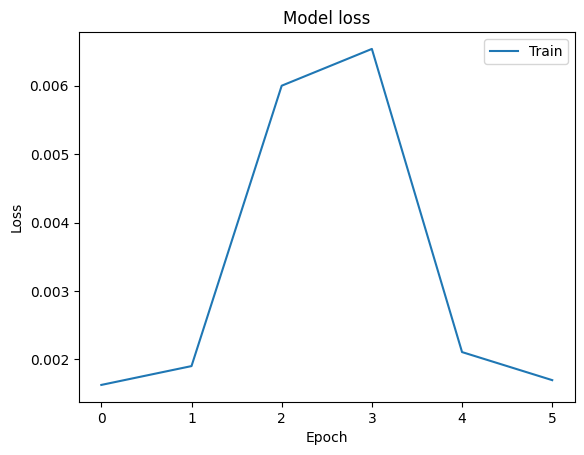

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

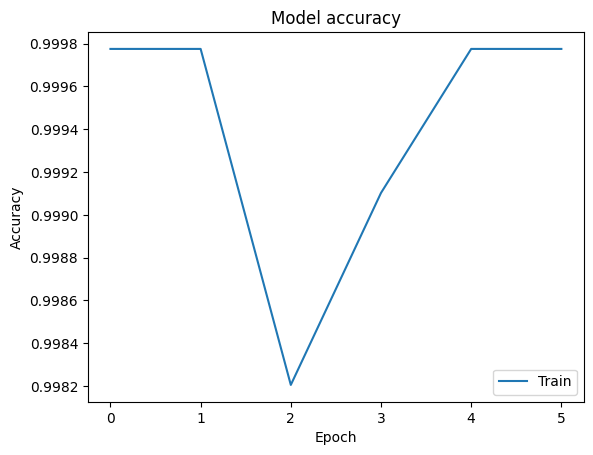

In [38]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()
